In [1]:
### Don't mind about this
import warnings
warnings.filterwarnings('ignore')
###

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
covid = pd.read_csv('/content/drive/Shareddrives/IML_Covid/Covid Data.csv')

In [4]:
covid

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,...,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,...,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,...,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,...,2,2,2,2,2,2,2,2,7,97


In [5]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [6]:
for f in covid.columns:
    print(covid[f].value_counts(), end = "\n\n")
print(covid['PREGNANT'].unique())

2    662903
1    385672
Name: USMER, dtype: int64

12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64

1    525064
2    523511
Name: SEX, dtype: int64

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: DATE_DIED, Length: 401, dtype: int64

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64

97    523511
2     513179
1     

# **1. Pre-Processing DATE_DIED feature to be boolean:** 1 if the patient died, 2 otherwise because the date is irrelevant to the label.

In [7]:
# Replace all patients death date with 1, and 2 for patients who are still alive
covid['DATE_DIED'] = np.where(covid['DATE_DIED']!='9999-99-99', 1, 2)
# Rename the column
covid.rename(columns={'DATE_DIED':'DEAD'}, inplace=True)
# Check if the values where changed correctly
print(covid['DEAD'].unique())

[1 2]


# **2. Pre-Processing PREGNANT feature:** by replacing the NULL values for males(2) to be not pregnant(2)

In [8]:
# Replace datapoints of males to be not pregnant
covid.loc[covid['SEX'] == 2, 'PREGNANT'] = 2
print(covid['PREGNANT'].unique())
# covid.to_csv("Dead_Pregnant_modifications.csv", index=False)

[ 2 98  1]


# **3. Get Correlations** between each feature and the label, and between all features and each other

In [9]:
print("Correlations: ")
for name in covid.columns:
    correlation = covid[ [ name ,'CLASIFFICATION_FINAL'] ].corr()
    ans = abs(correlation.iloc[0][1]) * 100
    if(name != 'CLASIFFICATION_FINAL'):
        print(name + " = " + str(ans) + "%")

Correlations: 
USMER = 2.883984929026443%
MEDICAL_UNIT = 7.9981401551828535%
SEX = 5.778200930186289%
PATIENT_TYPE = 18.336965819874866%
DEAD = 19.60850330534246%
INTUBED = 19.30751468182551%
PNEUMONIA = 7.535121763674622%
AGE = 15.263746029745228%
PREGNANT = 0.03359302748542046%
DIABETES = 0.47387655178426175%
COPD = 1.0336483259646734%
ASTHMA = 1.1177889087449102%
INMSUPR = 0.9411781788913769%
HIPERTENSION = 0.6020237325700838%
OTHER_DISEASE = 1.1142710652587846%
CARDIOVASCULAR = 1.2142899794549882%
OBESITY = 0.6924411016774965%
RENAL_CHRONIC = 1.1342198411331843%
TOBACCO = 1.256707629152292%
ICU = 19.3163200132346%


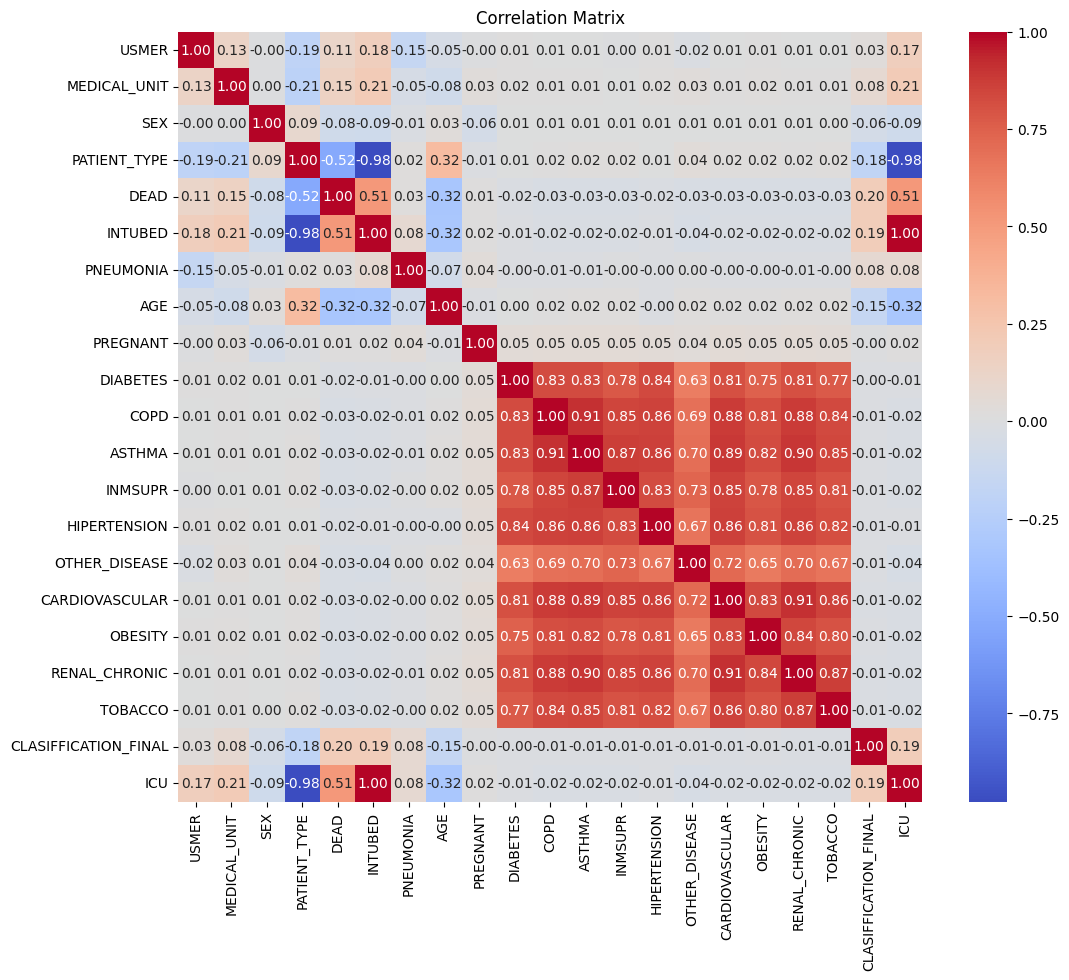

In [10]:
correlation_matrix = covid.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# **4. Drop features with more than 50% NULL values**

In [11]:
rows = covid.shape[0]
rows

1048575

In [12]:
# Check for every column has more than 50% NULL features, drop this column
for f in covid.columns:
    print(covid[f].value_counts(), end = "\n\n")
    if(f not in ('AGE', 'MEDICAL_UNIT', 'CLASIFFICATION_FINAL')):
        if((covid[f].value_counts().loc[1] + covid[f].value_counts().loc[2])/rows < 0.5):
            covid = covid.drop(columns=[f])


2    662903
1    385672
Name: USMER, dtype: int64

12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64

1    525064
2    523511
Name: SEX, dtype: int64

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

2    971633
1     76942
Name: DEAD, dtype: int64

97    848544
2     159050
1      33656
99      7325
Name: INTUBED, dtype: int64

2     892534
1     140038
99     16003
Name: PNEUMONIA, dtype: int64

30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64

2     1036690
1        8131
98       3754
Name: PREGNANT, dtype: int64

2     920248
1     124989
98      3338
Name: DIABETES, dtype: int64

2     1030510
1       15062
98       3003
Name: COPD, dtype: int64

2     1014024
1       31572
98       2979
Name: 

In [15]:
# Check if there are columns that have been deleted
covid.info()
covid.to_csv("Drop_Dead_Pregnant.csv", index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   USMER                 1048575 non-null  int64
 1   MEDICAL_UNIT          1048575 non-null  int64
 2   SEX                   1048575 non-null  int64
 3   PATIENT_TYPE          1048575 non-null  int64
 4   DEAD                  1048575 non-null  int64
 5   PNEUMONIA             1048575 non-null  int64
 6   AGE                   1048575 non-null  int64
 7   PREGNANT              1048575 non-null  int64
 8   DIABETES              1048575 non-null  int64
 9   COPD                  1048575 non-null  int64
 10  ASTHMA                1048575 non-null  int64
 11  INMSUPR               1048575 non-null  int64
 12  HIPERTENSION          1048575 non-null  int64
 13  OTHER_DISEASE         1048575 non-null  int64
 14  CARDIOVASCULAR        1048575 non-null  int64
 15  OBESITY        

# **5. Pre-Processing the highest correlated features to each other from the heat map:** This is done by binary classification using Eucledian Distance(Method 1).

In [ ]:
  df_copy = pd.DataFrame(covid)
  df_copy.replace([97, 98, 99], None, inplace=True)
  # List of columns to calculate the mean for
  columns = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO']
  df_copy = df_copy[columns]

  for column in columns:
      # for index, row in df[df_copy[column].isnull()].iterrows():
      disease_one = df_copy[df_copy[column] == 1]
      disease_two = df_copy[df_copy[column] == 2]
      average_one = disease_one[columns].mean().values
      average_two = disease_two[columns].mean().values
      print("average_one: ", average_one, "average_two: ", average_two, end="\n\n")
      for index, row in df_copy.iterrows():
          # Calculate Euclidean distance
          if row[column] == None:
              distance_1 = np.sqrt(np.sum((row - average_one) ** 2))
              distance_2 = np.sqrt(np.sum((row - average_two) ** 2))
              # print("distance_1", distance_1, "distance_2", distance_2, end="\n\n")
              if (distance_1 == 0 and distance_2 == 0):
                  covid = covid.drop(index)
                  df_copy = df_copy.drop(index)
              elif (distance_1 < distance_2):
                  covid.at[index, column] = 1
              elif (distance_2 < distance_1):
                  covid.at[index, column] = 2
              else:
                  print("sth error")
              # break
      print(covid[column].unique(), end="\n\n ---------------------------------------------------------")
      print(covid.shape[0], df_copy.shape[0])
      # break

average_one:  [1.         1.95411801 1.96813256 1.96959885 1.47147421 1.95899432
 1.93901081 1.73283226 1.92135687 1.90879001] average_two:  [2.         1.98989048 1.97004634 1.98874863 1.89505328 1.97509685
 1.98573733 1.86278002 1.99014778 1.92075396]

[2 1]

 ---------------------------------------------------------1046437 1046437
average_one:  [1.61887018 1.         1.91910591 1.93303155 1.49112426 1.92401764
 1.85264768 1.73037293 1.9091151  1.77254276] average_two:  [1.88433704 2.         1.97056343 1.98723145 1.84960492 1.97388657
 1.98202869 1.84894827 1.98299739 1.92146658]

[2 1]

 ---------------------------------------------------------1046437 1046437
average_one:  [1.87383074 1.96145067 1.         1.97276623 1.81238113 1.96068023
 1.96427553 1.75614858 1.97971152 1.91058406] average_two:  [1.88070993 1.98637168 2.         1.98688155 1.84543431 1.97355107
 1.98065256 1.85007992 1.98200107 1.91958159]

[2 1]

 ---------------------------------------------------------1046437 

In [ ]:
covid.to_csv("/content/drive/Shareddrives/IML_Covid/step5.csv", index=False)

In [ ]:
print(covid['PREGNANT'].value_counts())
print(covid['PNEUMONIA'].value_counts())

2     1034722
1        8126
98       3589
Name: PREGNANT, dtype: int64
2     890896
1     139542
99     15999
Name: PNEUMONIA, dtype: int64


In [ ]:
# Since Patients with NULL pregnancy and pneumonia are very small percent of the dataset(0.35% & 1.6%), we can drop them
covid = covid[covid['PREGNANT'] != 98]
covid = covid[covid['PNEUMONIA'] != 99]
# Check if there are no more NULLs
for f in covid.columns:
  print(covid[f].value_counts(), end = "\n\n")

2    658899
1    368313
Name: USMER, dtype: int64

12    592991
4     307135
6      38370
9      37387
3      18746
8      10208
10      7741
5       7058
11      5563
7        885
13       818
2        159
1        151
Name: MEDICAL_UNIT, dtype: int64

2    514921
1    512291
Name: SEX, dtype: int64

1    833239
2    193973
Name: PATIENT_TYPE, dtype: int64

2    951478
1     75734
Name: DEAD, dtype: int64

2    887923
1    139289
Name: PNEUMONIA, dtype: int64

30     26529
31     25495
28     24817
29     24673
34     24499
       ...  
118        2
116        2
121        1
111        1
113        1
Name: AGE, Length: 121, dtype: int64

2    1019346
1       7866
Name: PREGNANT, dtype: int64

2    903706
1    123506
Name: DIABETES, dtype: int64

2    1012309
1      14903
Name: COPD, dtype: int64

2    996266
1     30946
Name: ASTHMA, dtype: int64

2    1012932
1      14280
Name: INMSUPR, dtype: int64

2    866458
1    160754
Name: HIPERTENSION, dtype: int64

2    998719
1     28493
Na

In [ ]:
covid.to_csv("/content/drive/Shareddrives/IML_Covid/final_method_1.csv", index=False)

# **5. Pre-Processing all NULL features in one-step using Eucledian Distance**(Method 2)

In [16]:
df = pd.read_csv('/content/drive/Shareddrives/IML_Covid/Drop_Dead_Preg.csv')

In [17]:
# Exclude AGE column from the columns where the values [97,98,99] representing NULL are going to be replaced with None
columns_to_replace = [col for col in df.columns if col != 'AGE']
df[columns_to_replace] = df[columns_to_replace].replace([97, 98, 99], None)
# Chech that there are no more NULLs in this dataset represented as a number
for f in df.columns:
    print(df[f].unique(), end = "\n\n")

[2 1]

[1 2 3 4 5 6 7 8 9 10 11 12 13]

[1 2]

[1 2]

[1 2]

[1 2 None]

[ 65  72  55  53  68  40  64  37  25  38  24  30  48  23  80  61  54  59
  45  26  32  49  39  27  57  20  56  47  50  46  43  28  33  16  62  58
  36  44  66  52  51  35  19  90  34  22  29  14  31  42  15   1   0  17
  41   2  10  12  13   4   7   6   8  60   5  63  75  81  67  18  70  88
  85  92  73  74  78  76  82  77  86  71  95  87  83  84  79  69  89   3
  97  93 100  91  21 103  11   9  94  96 101 107 102  98  99 109 119 116
 105 104 111 114 120 106 108 110 118 117 121 115 113]

[2 None 1]

[2 1 None]

[2 1 None]

[2 1 None]

[2 1 None]

[1 2 None]

[2 1 None]

[2 1 None]

[2 1 None]

[2 1 None]

[2 1 None]

[3 5 7 6 1 2 4]



In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Assign the scaled values back to the original DataFrame
covid_scaled = pd.DataFrame(scaled_data, columns=df.columns)
for f in covid_scaled.columns:
    print(covid_scaled[f].value_counts(), end = "\n\n")

 0.762753    662903
-1.311040    385672
Name: USMER, dtype: int64

 0.810962    602995
-1.337684    314405
-0.800522     40584
 0.005220     38116
-1.606264     19175
-0.263361     10399
 0.273801      7873
-1.069103      7244
 0.542381      5577
 1.079543       996
-0.531942       891
-1.874845       169
-2.143426       151
Name: MEDICAL_UNIT, dtype: int64

-0.998520    525064
 1.001482    523511
Name: SEX, dtype: int64

-0.485525    848544
 2.059627    200031
Name: PATIENT_TYPE, dtype: int64

 0.281404    971633
-3.553607     76942
Name: DEAD, dtype: int64

 0.396105    892534
-2.524582    140038
Name: PNEUMONIA, dtype: int64

-0.697571    27010
-0.638425    25927
-0.815863    25313
-0.756717    25134
-0.460988    24872
             ...  
 4.270673        2
 4.388965        2
 4.093236        1
 4.684693        1
 4.211527        1
Name: AGE, Length: 121, dtype: int64

 0.088562     1036690
-11.291522       8131
Name: PREGNANT, dtype: int64

 0.368539    920248
-2.713417    124989
Na

In [19]:
# original_values = scaler.inverse_transform(covid_scaled)
# final = pd.DataFrame(original_values, columns=covid_scaled.columns)
# for f in final.columns:
#     print(final[f].unique(), end = "\n\n")

In [20]:
df_copy = pd.DataFrame(covid_scaled)
columns = ['DIABETES', 'COPD', 'ASTHMA', 'INMSUPR', 'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY', 'RENAL_CHRONIC', 'TOBACCO', 'PREGNANT', 'PNEUMONIA']
df_copy.drop(columns = ['CLASIFFICATION_FINAL'], inplace = True)

for column in columns:
    value0 = df_copy[column].value_counts().index[0]
    value1 = df_copy[column].value_counts().index[1]
    disease_one = df_copy[df_copy[column] == value0]
    disease_two = df_copy[df_copy[column] == value1]
    average_one = disease_one[disease_one.columns].mean().values
    average_two = disease_two[disease_two.columns].mean().values
    print("average_one: ", average_one, "average_two: ", average_two, end="\n\n")
    for index, row in df_copy.iterrows():
        # Calculate Euclidean distance
        if math.isnan(row[column]):
            distance_1 = np.sqrt(np.sum((row - average_one) ** 2))
            distance_2 = np.sqrt(np.sum((row - average_two) ** 2))
            # print("distance_1", distance_1, "distance_2", distance_2, end="\n\n")
            # print(row)
            if (distance_1 == 0 and distance_2 == 0):
                covid_scaled = covid_scaled.drop(index)
                df_copy = df_copy.drop(index)
            elif (distance_1 < distance_2):
                covid_scaled.at[index, column] = value0
            elif (distance_2 < distance_1):
                covid_scaled.at[index, column] = value1
            else:
                print("sth error")
            # print(row, "Done", end="\n\n")
    # Chech if the Null values have been replaced correctly
    print(covid_scaled[column].unique(), end="\n\n ---------------------------------------------------------")
    print(covid_scaled.shape[0], df_copy.shape[0])


average_one:  [ 0.02011619  0.02560022 -0.0046173  -0.09572377  0.08159564  0.08128185
 -0.12341926 -0.0092826   0.368539    0.03605372  0.00141158  0.0199422
  0.13986546  0.0121653   0.04015058  0.04344777  0.06175185  0.00539332] average_two:  [-0.15347946 -0.19570048  0.02947555  0.69341168 -0.58584483 -0.58622267
  0.89724826  0.06711496 -2.71341702 -0.26416344 -0.00977196 -0.14564879
 -1.0285495  -0.08741474 -0.29471812 -0.31767146 -0.45453678 -0.03852766]

[ 0.368539   -2.71341702]

 ---------------------------------------------------------1048575 1048575
average_one:  [ 0.00264547  0.00360916 -0.00089253 -0.01557661  0.01267693  0.01233246
 -0.02144784 -0.00118428  0.01207083  0.12089691  0.00443331  0.00682293
  0.01449915  0.00468081  0.01357238  0.00500993  0.00808685  0.00800943] average_two:  [-0.21975827 -0.29672389  0.02591343  0.98272787 -0.74240271 -0.78016539
  1.3821238   0.07114623 -0.80608633 -8.2715097  -0.29626958 -0.46185157
 -0.97434614 -0.30371479 -0.91364514 

In [21]:
original_values = scaler.inverse_transform(covid_scaled)
final = pd.DataFrame(original_values, columns=covid_scaled.columns)
final = final.astype(int)

In [22]:
final.to_csv('/content/drive/Shareddrives/IML_Covid/final_method_2.csv', index= False)
final.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEAD,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,1,1,72,2,2,2,2,2,1,2,2,1,1,2,5
2,2,1,2,2,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,7
4,2,1,2,1,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3


# **6. Final Statistics on the dataset**

In [31]:
final = pd.read_csv('/content/drive/Shareddrives/IML_Covid/final_method_2.csv')
# Replace 4,5,6,7 to be only 4 as they all mean the same thing(not a carrier of covid or inconclusive test)
final.loc[final['CLASIFFICATION_FINAL'].isin ([5,6,7]), 'CLASIFFICATION_FINAL']  = 4
final.to_csv('/content/drive/Shareddrives/IML_Covid/Final.csv', index= False)
final.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DEAD,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL
0,2,1,1,1,1,1,65,2,2,2,2,2,1,2,2,2,2,2,3
1,2,1,2,1,1,1,72,2,2,2,2,2,1,2,2,1,1,2,4
2,2,1,2,2,1,2,55,2,1,2,2,2,2,2,2,2,2,2,3
3,2,1,1,1,1,2,53,2,2,2,2,2,2,2,2,2,2,2,4
4,2,1,2,1,1,2,68,2,1,2,2,2,1,2,2,2,2,2,3


In [32]:
for f in final:
  print(final[f].value_counts(), end = "\n\n")

2    662903
1    385672
Name: USMER, dtype: int64

12    602995
4     314405
6      40584
9      38116
3      19175
8      10399
10      7873
5       7244
11      5577
13       996
7        891
2        169
1        151
Name: MEDICAL_UNIT, dtype: int64

1    525064
2    523511
Name: SEX, dtype: int64

1    848544
2    200031
Name: PATIENT_TYPE, dtype: int64

2    971633
1     76942
Name: DEAD, dtype: int64

2    904745
1    143830
Name: PNEUMONIA, dtype: int64

30     27010
31     25927
28     25313
29     25134
34     24872
       ...  
114        2
116        2
111        1
121        1
113        1
Name: AGE, Length: 121, dtype: int64

2    1037878
1      10697
Name: PREGNANT, dtype: int64

2    922132
1    126443
Name: DIABETES, dtype: int64

2    1032312
1      16263
Name: COPD, dtype: int64

2    1016089
1      32486
Name: ASTHMA, dtype: int64

2    1032962
1      15613
Name: INMSUPR, dtype: int64

2    884437
1    164138
Name: HIPERTENSION, dtype: int64

2    1018455
1      3012

In [33]:
print("Correlations: ")
for name in final.columns:
    correlation = final[ [ name ,'CLASIFFICATION_FINAL'] ].corr()
    ans = abs(correlation.iloc[0][1]) * 100
    if(name != 'CLASIFFICATION_FINAL'):
        print(name + " = " + str(ans) + "%")

Correlations: 
USMER = 0.5810295642010892%
MEDICAL_UNIT = 4.553922310851523%
SEX = 5.1765038825045355%
PATIENT_TYPE = 17.532570007042782%
DEAD = 18.870111807043873%
PNEUMONIA = 17.582168918887405%
AGE = 14.6482503763176%
PREGNANT = 0.6018364253746976%
DIABETES = 8.875245295503493%
COPD = 1.1029871972147935%
ASTHMA = 1.6151815786611659%
INMSUPR = 0.4132704366255451%
HIPERTENSION = 8.134929922326833%
OTHER_DISEASE = 0.2727896017981867%
CARDIOVASCULAR = 1.3664018563477038%
OBESITY = 6.511289790085584%
RENAL_CHRONIC = 1.5504070954501303%
TOBACCO = 1.5703446410291817%


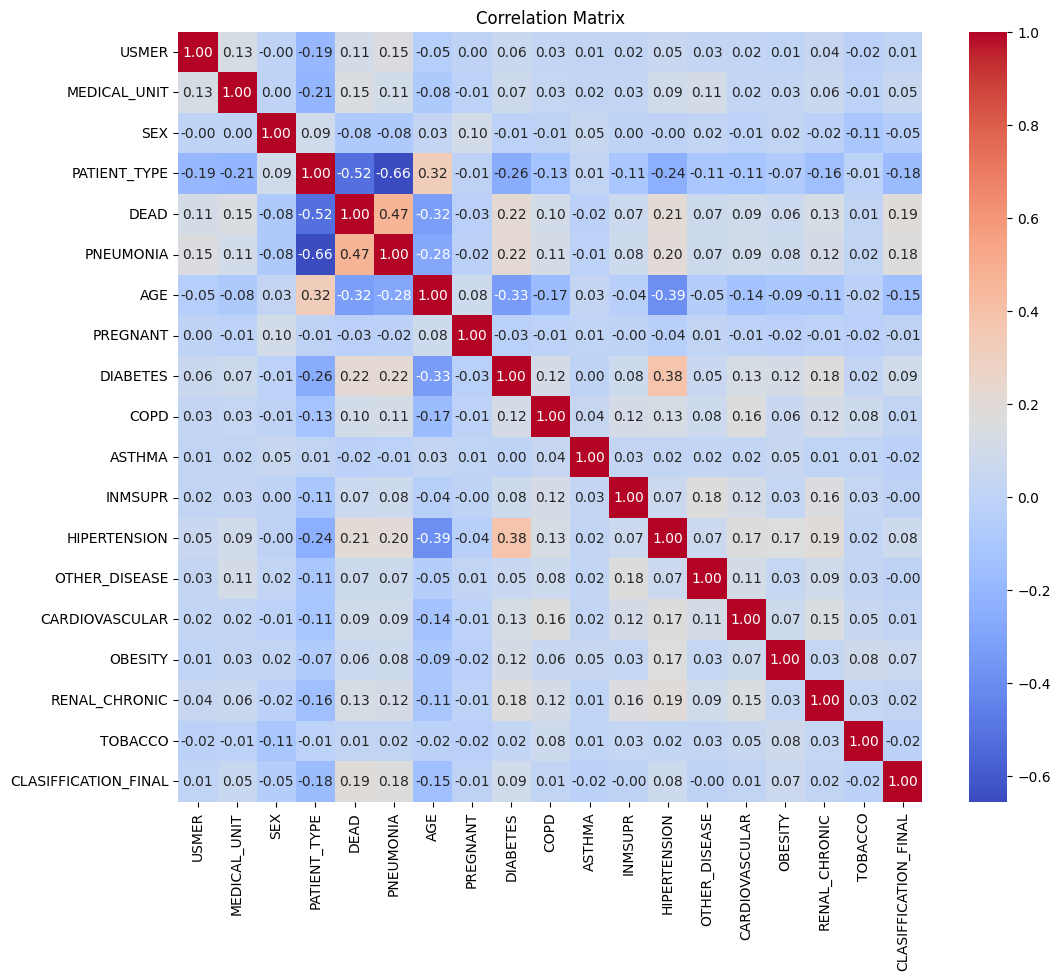

In [34]:
correlation_matrix = final.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [35]:
print(final.describe())


              USMER  MEDICAL_UNIT           SEX  PATIENT_TYPE          DEAD  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.632194e+00  8.980565e+00  1.499259e+00  1.190765e+00  1.926622e+00   
std    4.822084e-01  3.723278e+00  4.999997e-01  3.929041e-01  2.607556e-01   
min    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.000000e+00  4.000000e+00  1.000000e+00  1.000000e+00  2.000000e+00   
50%    2.000000e+00  1.200000e+01  1.000000e+00  1.000000e+00  2.000000e+00   
75%    2.000000e+00  1.200000e+01  2.000000e+00  1.000000e+00  2.000000e+00   
max    2.000000e+00  1.300000e+01  2.000000e+00  2.000000e+00  2.000000e+00   

          PNEUMONIA           AGE      PREGNANT      DIABETES          COPD  \
count  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06  1.048575e+06   
mean   1.862833e+00  4.179410e+01  1.989799e+00  1.879414e+00  1.984490e+00   
std    3.440238e-01  1.690739e+01  1.004858e-01  3.

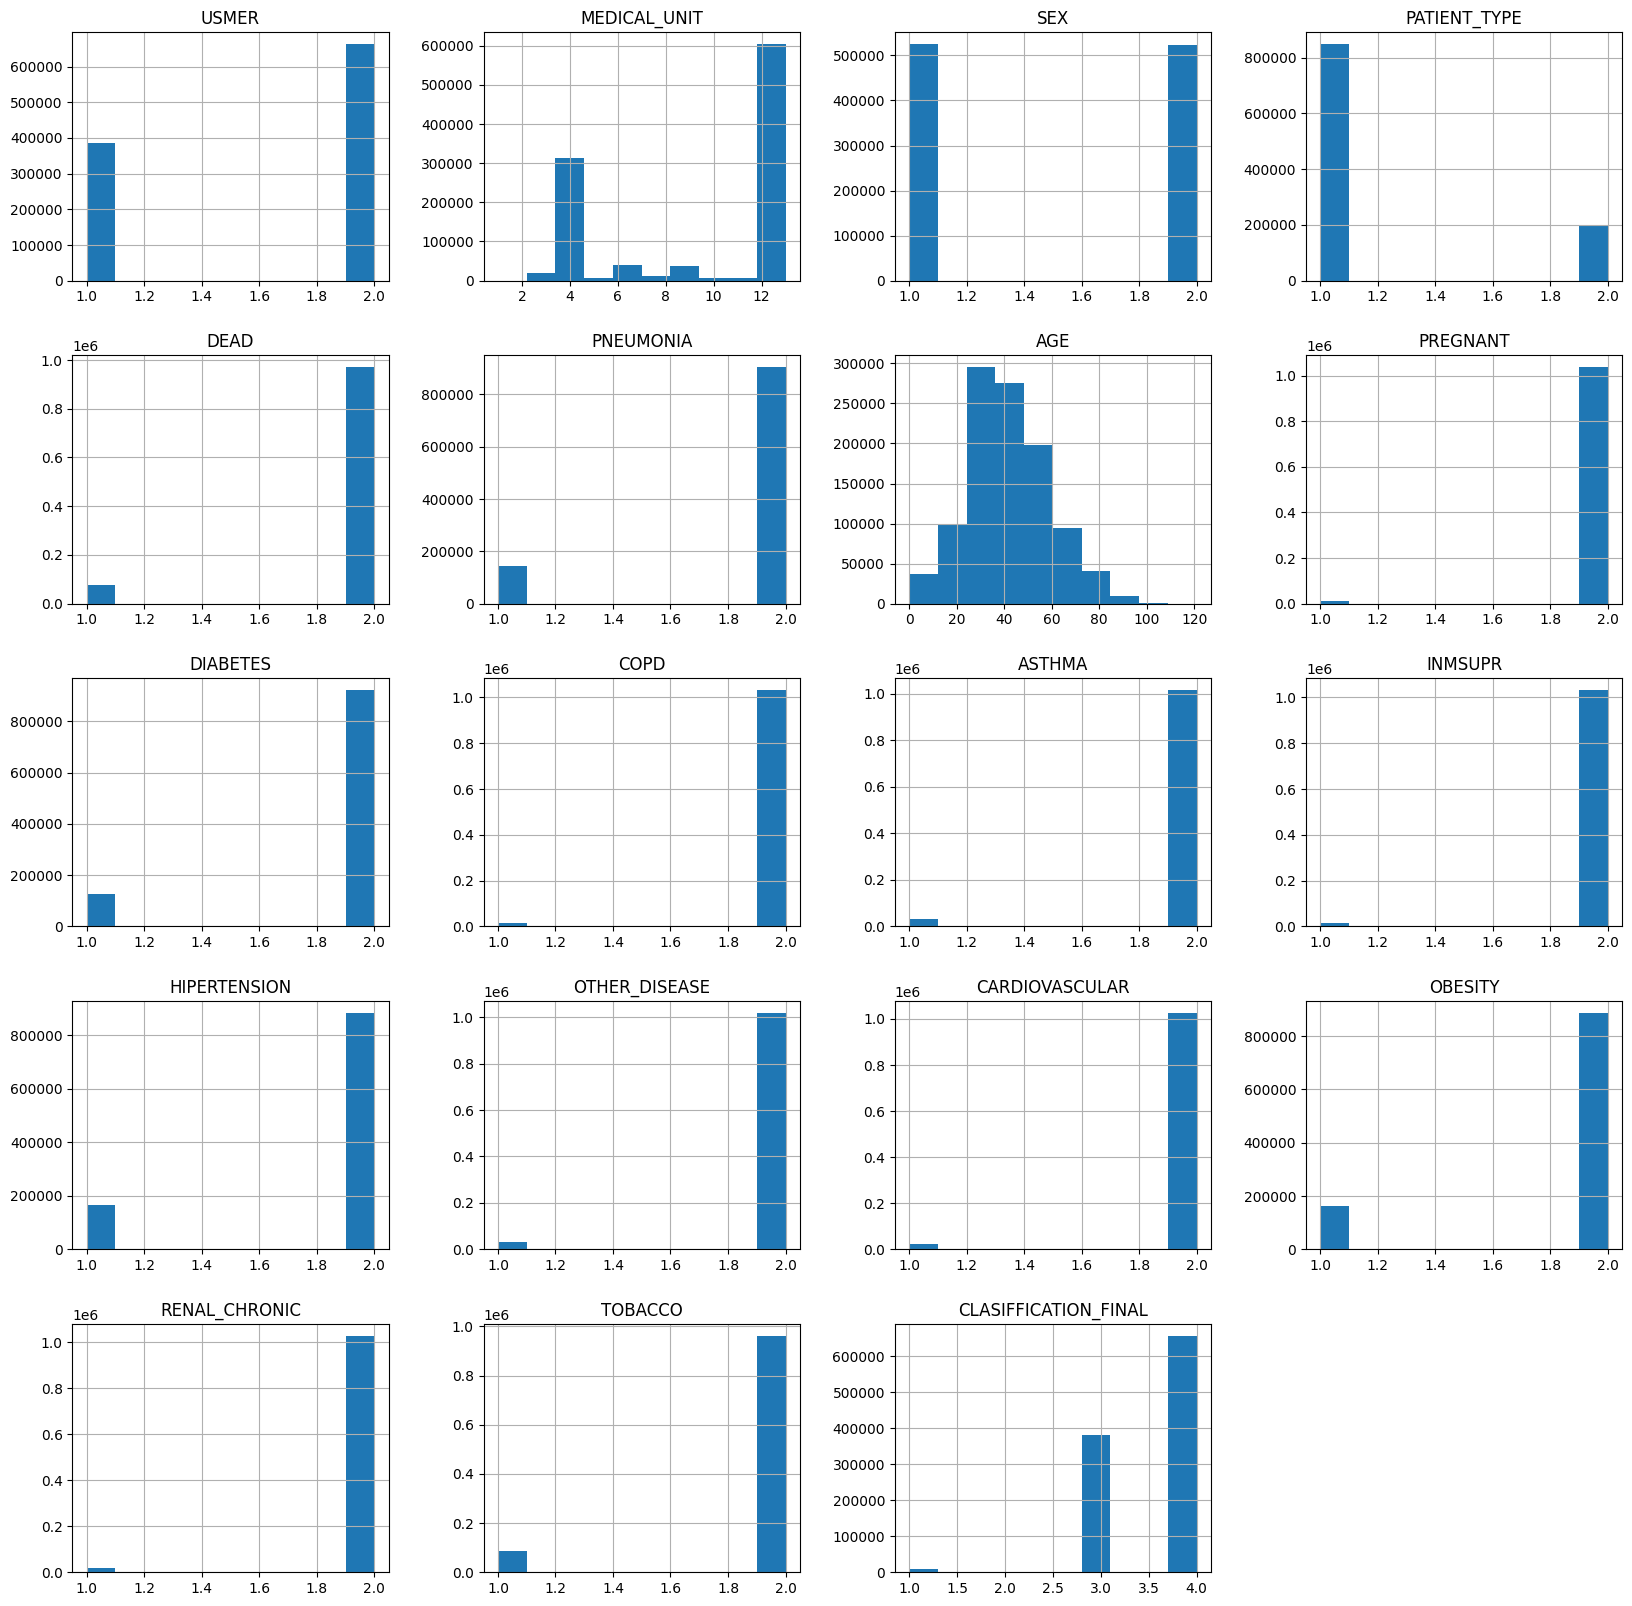

In [36]:
final.hist(figsize=(20, 20))
plt.show()

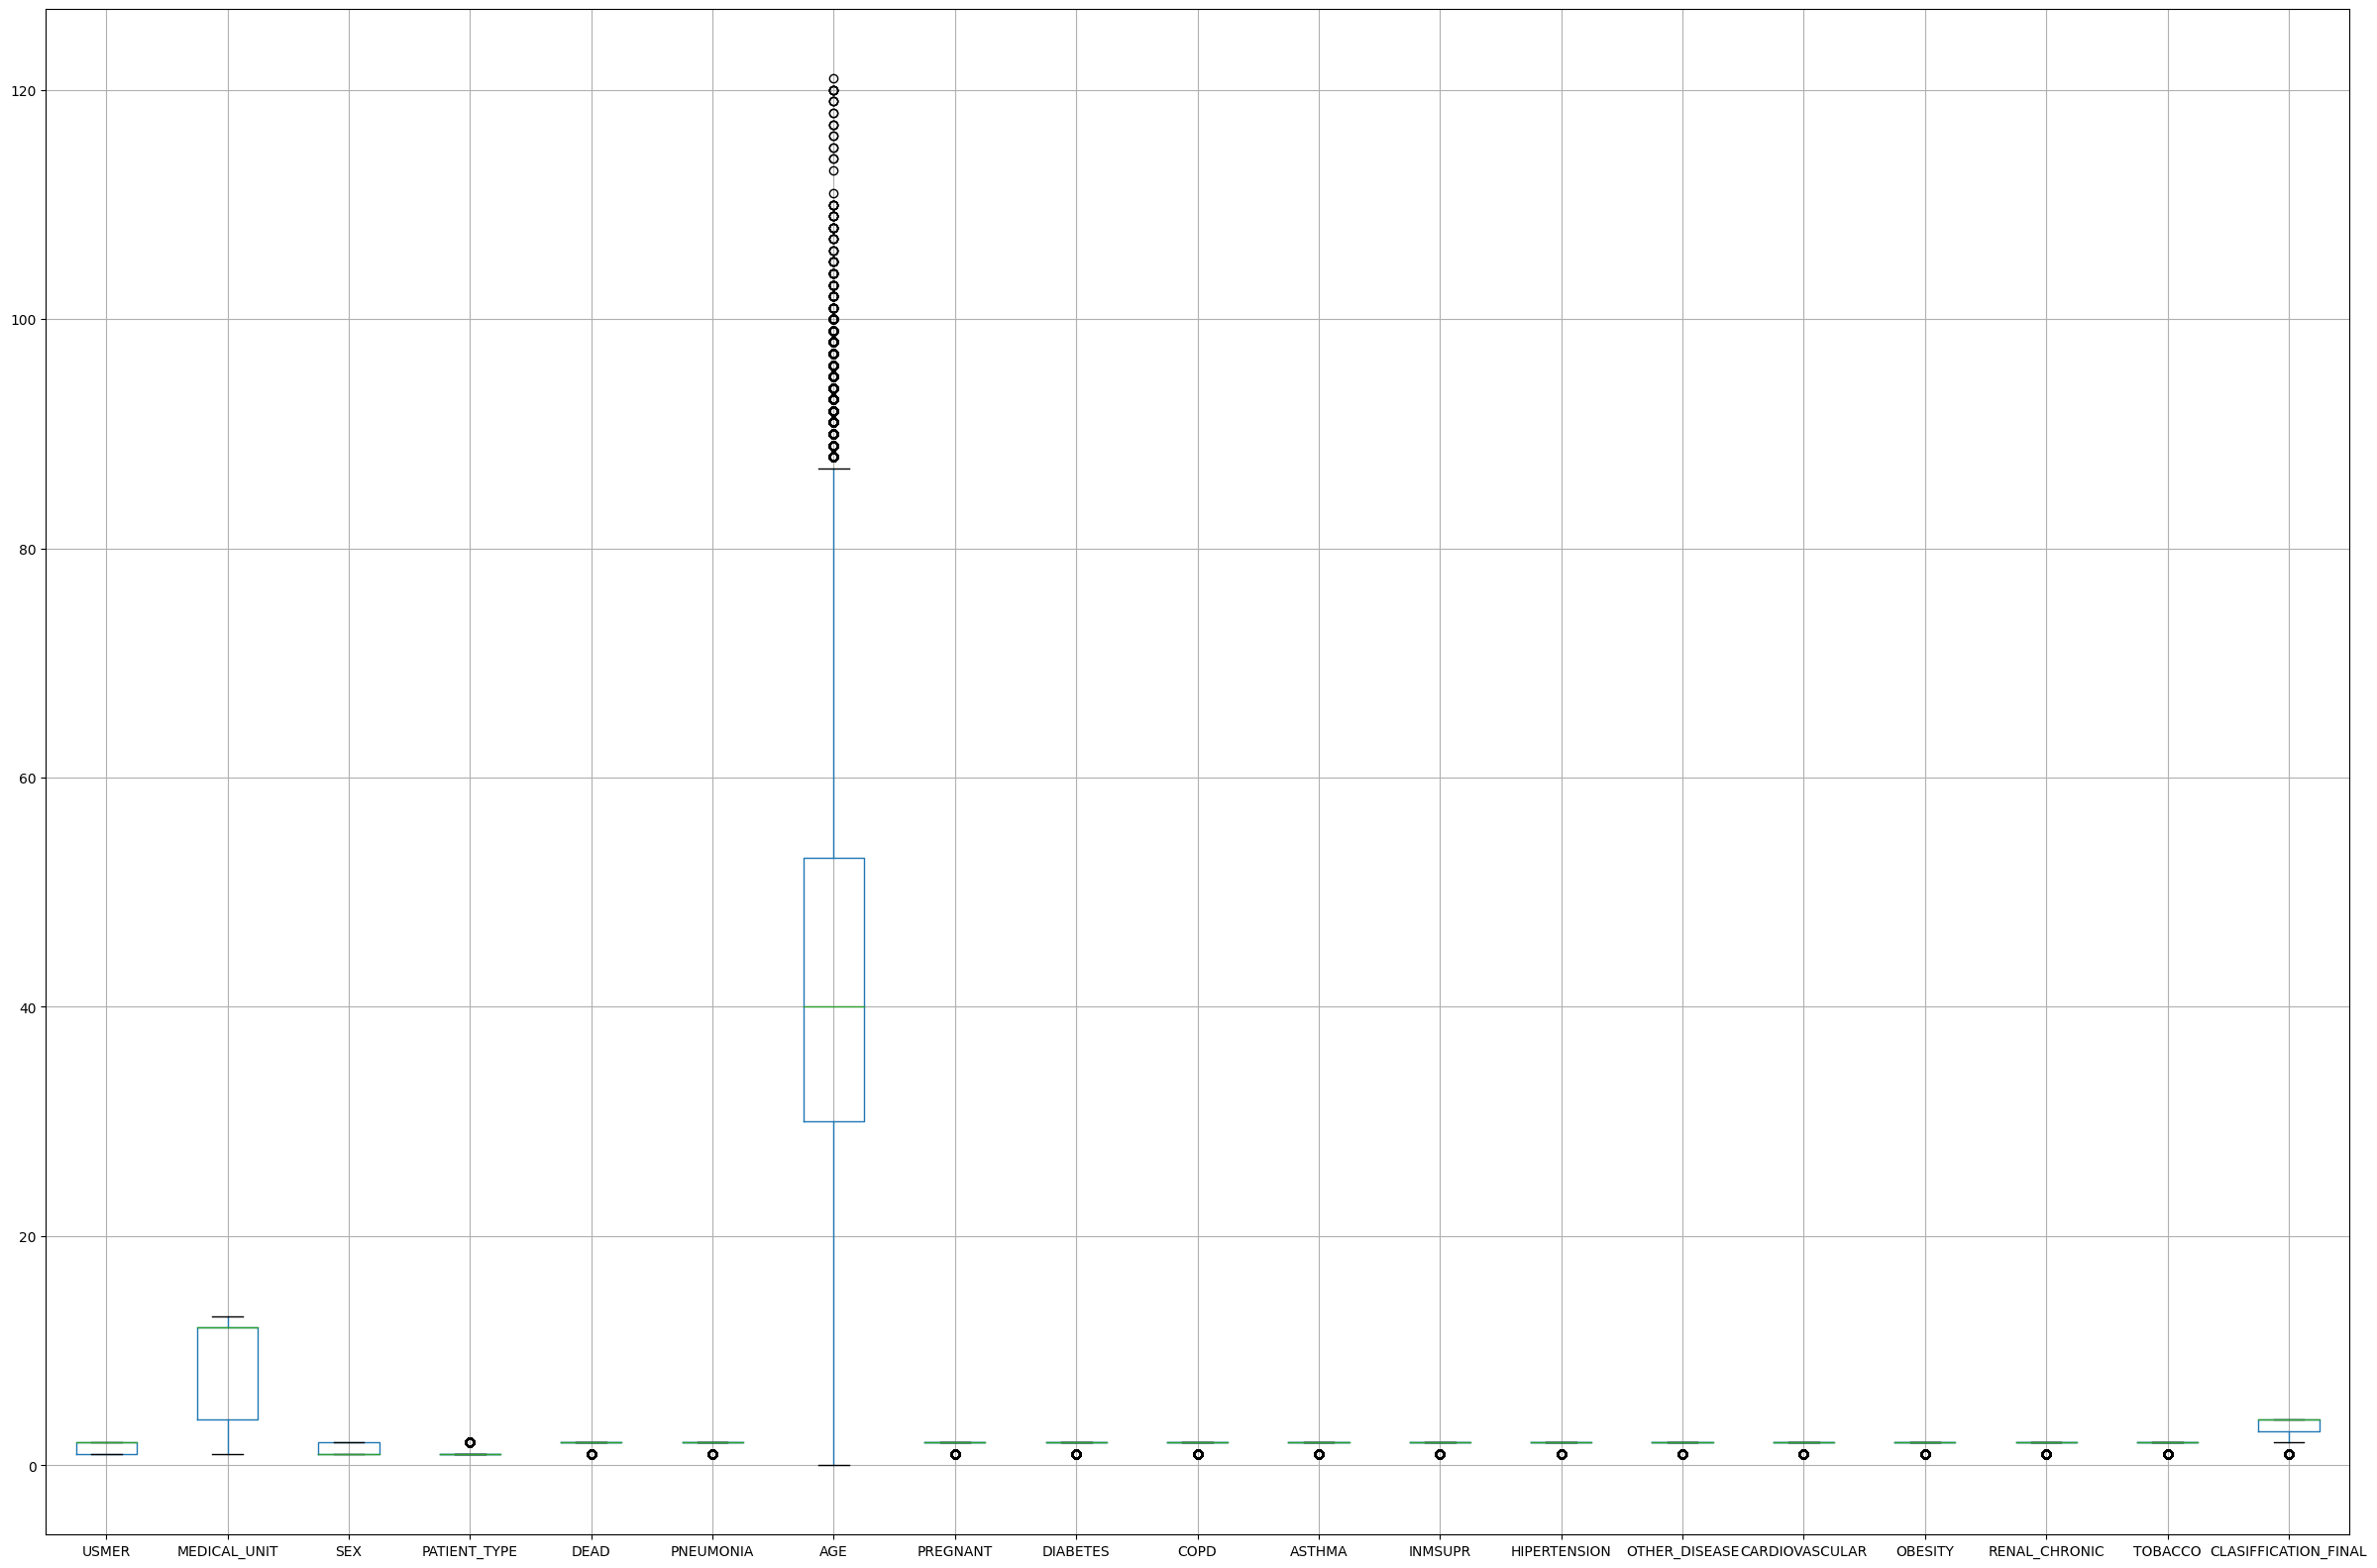

In [37]:
final.boxplot(figsize=(30, 20))
plt.show()

In [38]:
# Finitoooo covidooo